# Exercises: 3

This document contains all my solutions to Exercises 3 of the Statical Data Analysis course at the University of Turku.

In [1]:
# Import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.weightstats as ws

## 1. Descriptive statistics and estimation in literature

Identify the visualisations and numerical summaries used in the given parts of the following two articles. Are
the reported numbers used for descriptive analysis or estimation? (NOTE: You may have to browse through the
whole article in order to fully understand the study.)

• Article 3 (Figures 1 & 2 and related discussion): P. Andre et al., Globally representative evidence on the
actual and perceived support for climate action, DOI: https://doi.org/10.1038/s41558-024-01925-3

• Article 4 (Table 1): M.S. Venäläinen et al., Easy-to-use tool for evaluating the elevated acute kidney
injury risk against reduced cardiovascular disease risk during intensive blood pressure control, DOI:
https://doi.org/10.1097/HJH.0000000000002282

### Solution:

#### Article 3 (Figures 1 & 2 and related discussion): P. Andre et al., Globally representative evidence on the actual and perceived support for climate action, DOI: https://doi.org/10.1038/s41558-024-01925-3



Looking at Figures 1 and 2 in the article, it can be seen that the first graph shows the proportion of people who expressed their opinion in each country and the second graph shows the correlations between countries and some of their characteristics.

Figure 1 shows all these proportions as bar charts and coloured areas on a map. The figures are also shown in the text and bar charts.

Figure 2 shows the correlations between country shares and other country characteristics. These data are presented as scatter plots. Correlation coefficients are given both in the text and in the graphs. Figure 2 shows some of the characteristics that may affect the results.

#### Article 4 (Table 1): M.S. Venäläinen et al., Easy-to-use tool for evaluating the elevated acute kidney injury risk against reduced cardiovascular disease risk during intensive blood pressure control, DOI: https://doi.org/10.1097/HJH.0000000000002282

The article was not accessible.

## 2. More cyclists

Load the data available in the file more-cyclists.csv, which contains daily numbers of cyclists spotted on selected streets.

• For each weekday (Monday - Sunday), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.

• For each month (January - December), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.

• For each pair of streets, calculate the Spearman’s correlation coefficient and create a scatter plot.

• What information do these plots reveal?

### Solution:

#### Load the data available in the file more-cyclists.csv, which contains daily numbers of cyclists spotted on selected streets.

In [2]:
# Load the data
cyclists = pd.read_csv('data/more-cyclists.csv')

#### For each weekday (Monday - Sunday), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.

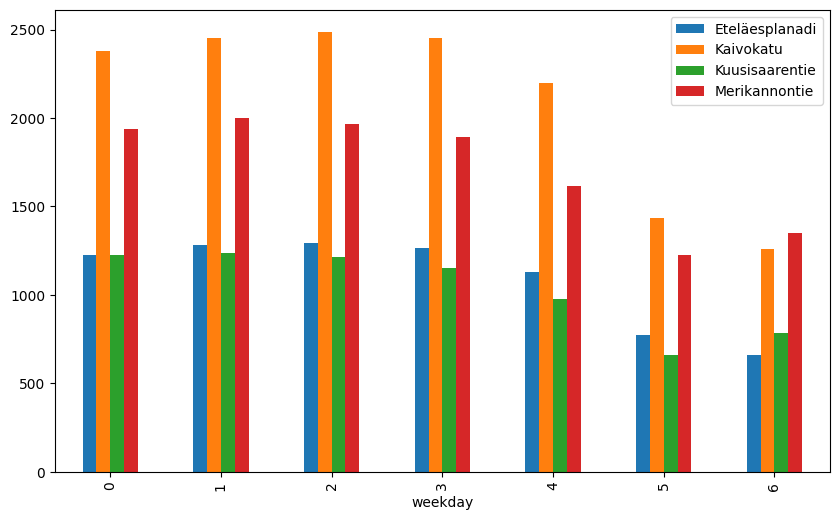

In [3]:
# Difine the streets for its own dataframes
streets = cyclists.columns[:4]

# Group the streets per each weekday
grouped_days = cyclists.groupby('weekday')[streets]

# Calculate the mean of the streets per each weekday
means = grouped_days.mean()

# Plot the data
means.plot.bar(figsize=(10, 6))
plt.show()

Looking at the first graph of the number of cyclists on weekdays, it can be seen that the proportion of street traffic looks fairly similar on each weekday. On weekdays there is clearly more traffic, but on Sundays the average traffic volume on the "Kuusisaarentie" is higher than on other days. In any case, the graph looks quite similar, and we can see that Kaivokatu has the most traffic, regardless of the day, except on Sundays.

#### For each month (January - December), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.

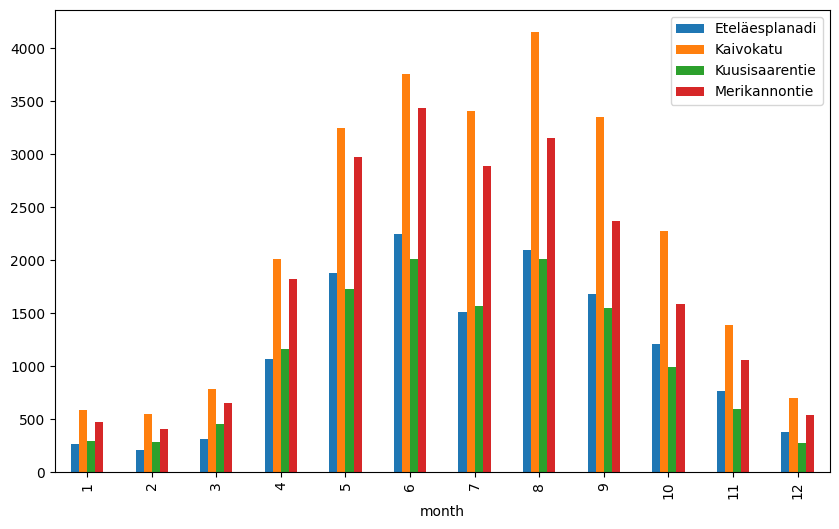

In [4]:
# Group the streets per each months
grouped_months = cyclists.groupby('month')[streets]

# Calculate the mean of the streets per each month
means = grouped_months.mean()

# Plot the data
means.plot.bar(figsize=(10, 6))
plt.show()

The first and most significant finding is that traffic is heaviest in the summer months. This is pretty obvious when it comes to cycling. The correlation between the different streets seems quite high, but on the other hand there is some variation on the Eteläesplanadi and Kuusisaarentie.

#### For each pair of streets, calculate the Spearman’s correlation coefficient and create a scatter plot.

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie
Eteläesplanadi,1.000000,0.892638,0.892009,0.896663
Kaivokatu,0.892638,1.000000,0.950914,0.962023
Kuusisaarentie,0.892009,0.950914,1.000000,0.979178
Merikannontie,0.896663,0.962023,0.979178,1.000000


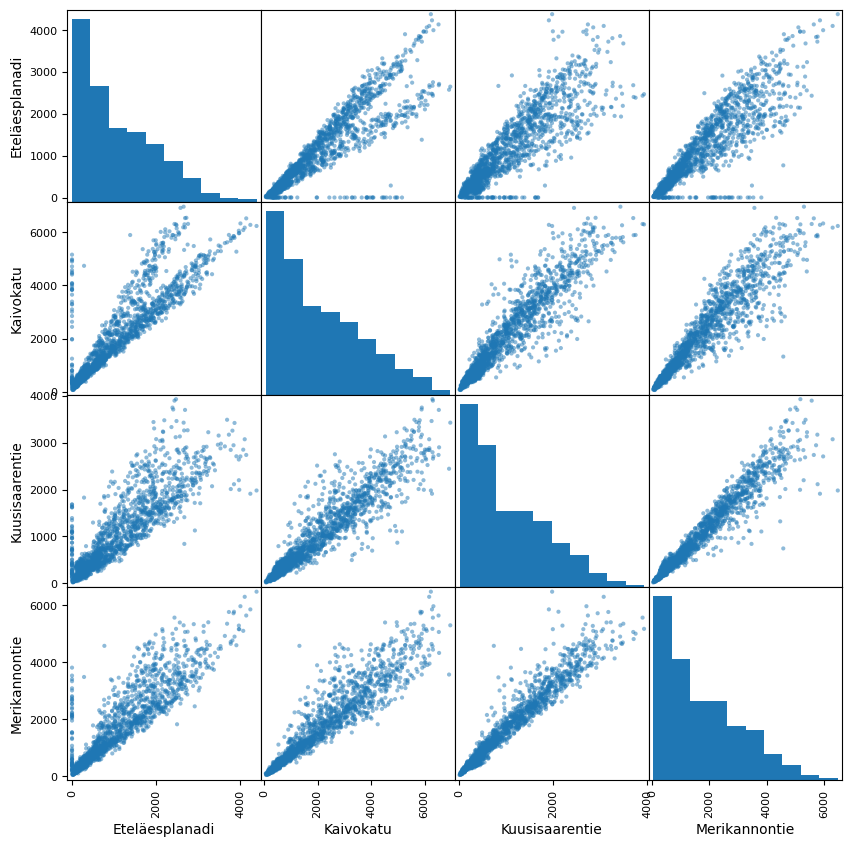

In [5]:
# Calcualate the Spearman correlation between the streets
pd.plotting.scatter_matrix(cyclists[streets], figsize=(10, 10))
cyclists[streets].corr(method='spearman')

Looking at Spearman's correlation table, it can be seen that every streets has a high correlation. This means that if one value increases, usually all other values increase.

The highest correlations are found on the streets between Kuusirannantie and Merikannantie, which means that both of these streets have the same type of ordinal variation.

## 3. Running
The file running.csv contains simulated lap times of 50 runners measured before and after training. You can assume that the sample is representative of the population.

• Estimate the mean and variance of lap times in the population before and after training.

• Estimate the mean change in lap times due to training.

• What conclusions can you make about the population and/or the training based on these estimates?

• (BONUS) Use confidence intervals to estimate the mean change. What conclusions can you make?

– See the statsmodels.stats.weightstats.DescrStatsW class and its tconfint_mean method available in the statsmodels library (https://www.statsmodels.org/stable/index.html).


### Solution:

#### Estimate the mean and variance of lap times in the population before and after training.

In [6]:
# Load the data
running = pd.read_csv('data/running.csv', header=0)

# Calculate the mean lap times of before and after the training
before = running['before'].mean()
after = running['after'].mean()

# Calculate the variance of lap times before and after the training
before_var = running['before'].var()
after_var = running['after'].var()

# Print the results'
print(f'Mean before training: {before}')
print(f'Mean after training: {after}')
print(f'Variance before training: {before_var}')
print(f'Variance after training: {after_var}')

Mean before training: 129.04160000000002
Mean after training: 124.9114
Variance before training: 107.47038514285717
Variance after training: 129.0596612653061


#### Estimate the mean change in lap times due to training.

In [7]:
# Calculate the mean change in laptimes
change = running['after'] - running['before']
mean_change = change.mean()

print(f'Mean change in laptimes: {mean_change}')

Mean change in laptimes: -4.130200000000001


#### Use confidence intervals to estimate the mean change. What conclusions can you make?

In [9]:
# Calculate the confidence interval
pd.DataFrame(ws.DescrStatsW(change).tconfint_mean(), columns=['Mean change'], index=['Lower', 'Upper'])

,Mean change
Lower,-8.290641
Upper,0.030241


We see that the average times before and after training vary and that runners clearly improve over time. The variance values show that the variance has increased. The reason for this increase may be that some runners may not have improved as well over time as others. In summary, there has been clear progress, but the training process or whatever has not worked as well for everyone.

In terms of confidence intervals, we can find values at the bottom and top of the range of -8.3 and 0.03. The lower one shows that it is possible that lap times can be up to 8.29 seconds faster after training. The upper value indicates how small the difference between before and after training can be. A value of 0.03 is very low, indicating that the training has not worked well for everyone.